# AL 6-6~6-8

### 1) 문제 정의

선형 조사법의 삽입 ,탐색, 삭제 알고리즘  

### 2) 알고리즘 설명

해시 충돌이 발생할 때, 충돌한 해시 슬롯의 다음 슬롯을 순차적으로 탐색하여 빈 슬롯을 찾는 방법인 선형조사법 알고리즘을 사용합니다.

### 3) 손으로 푼 예제

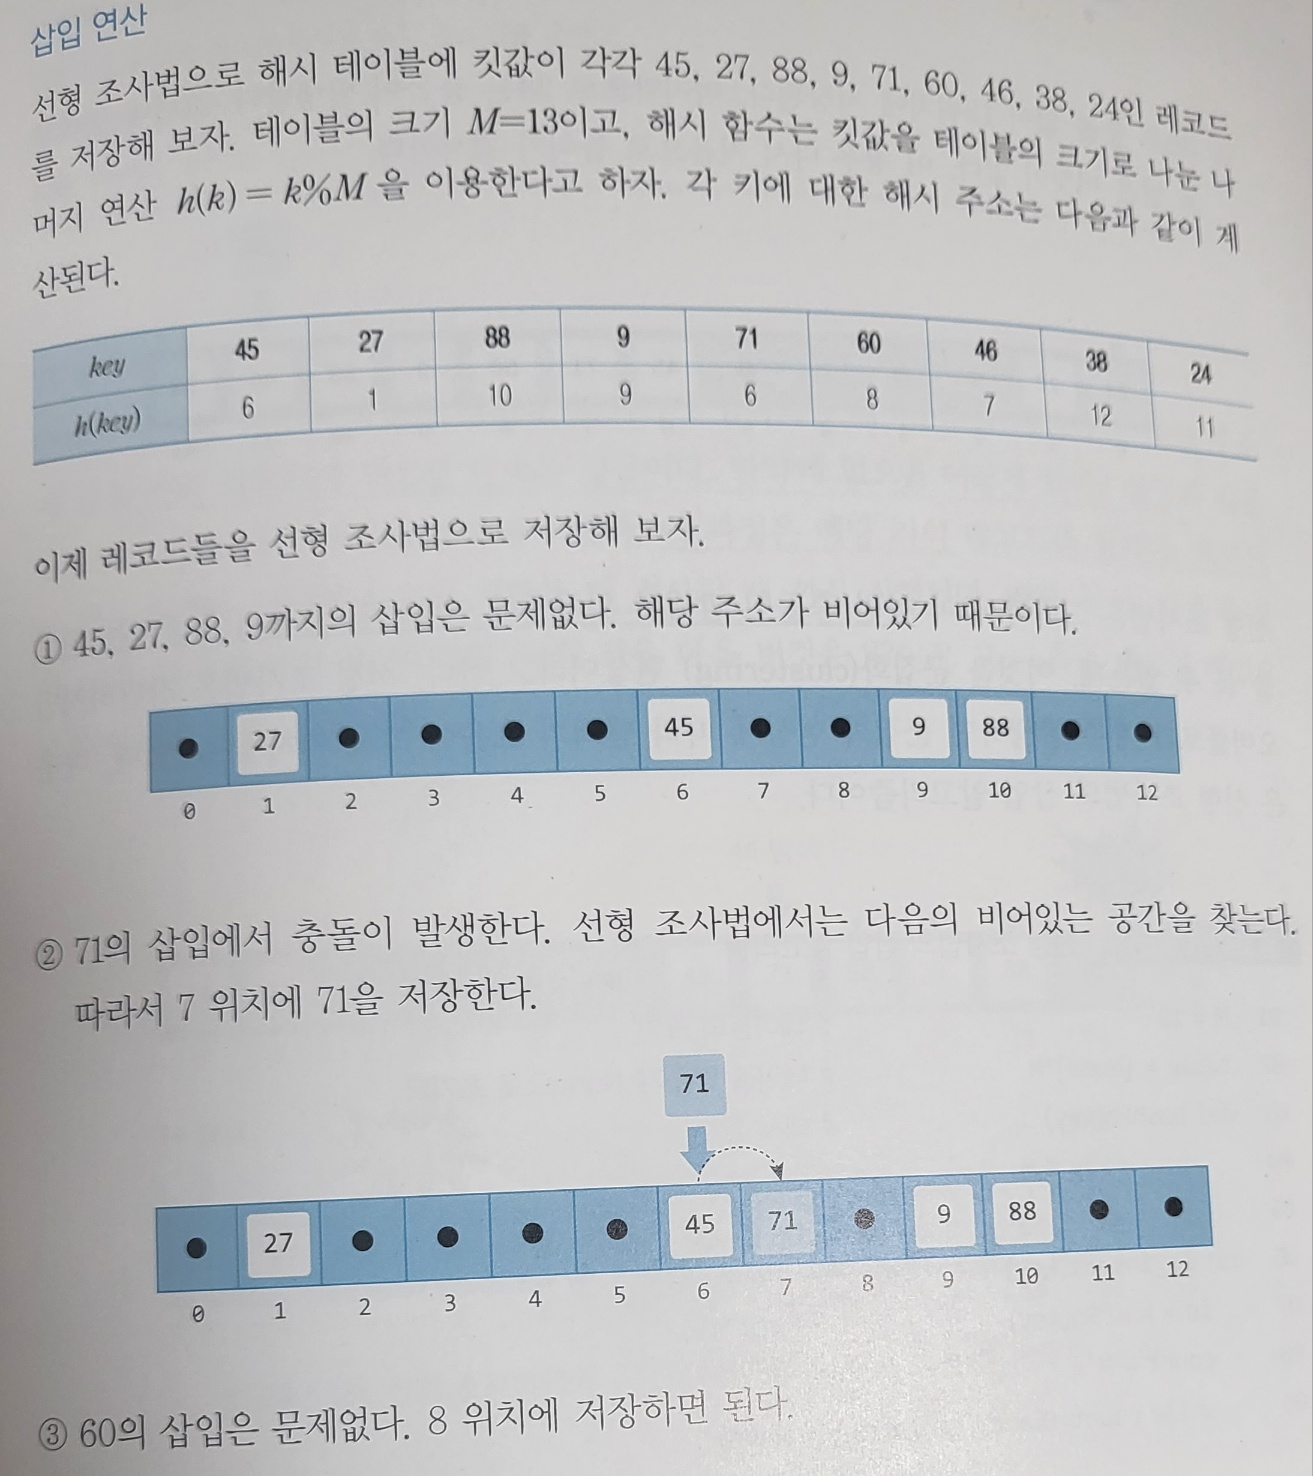  
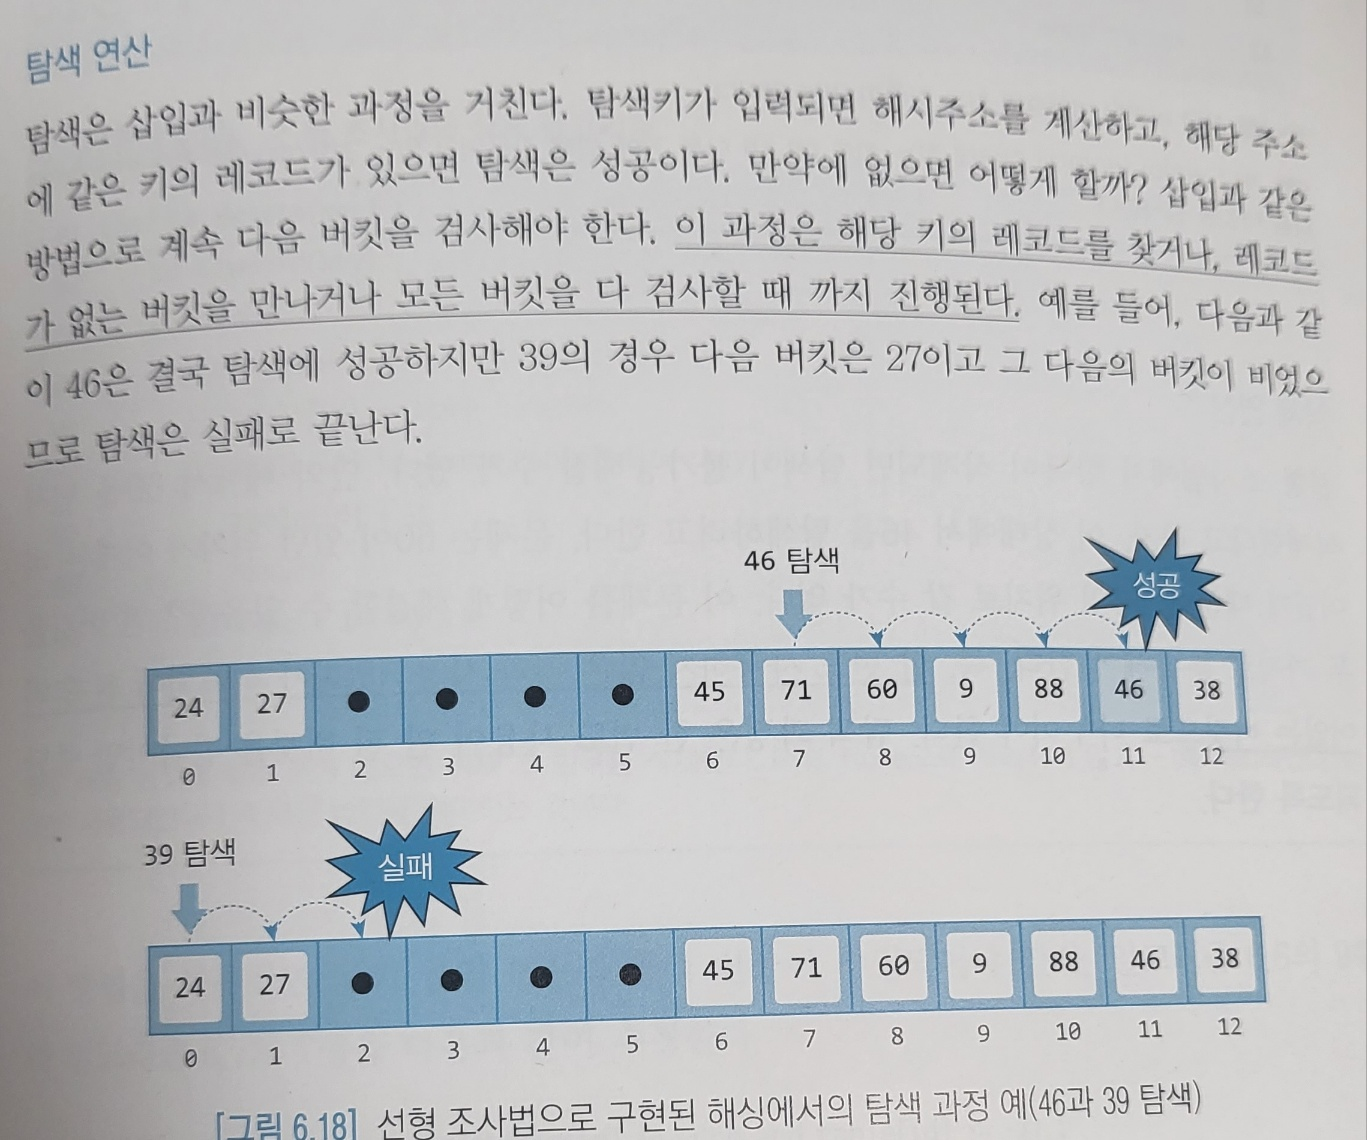  
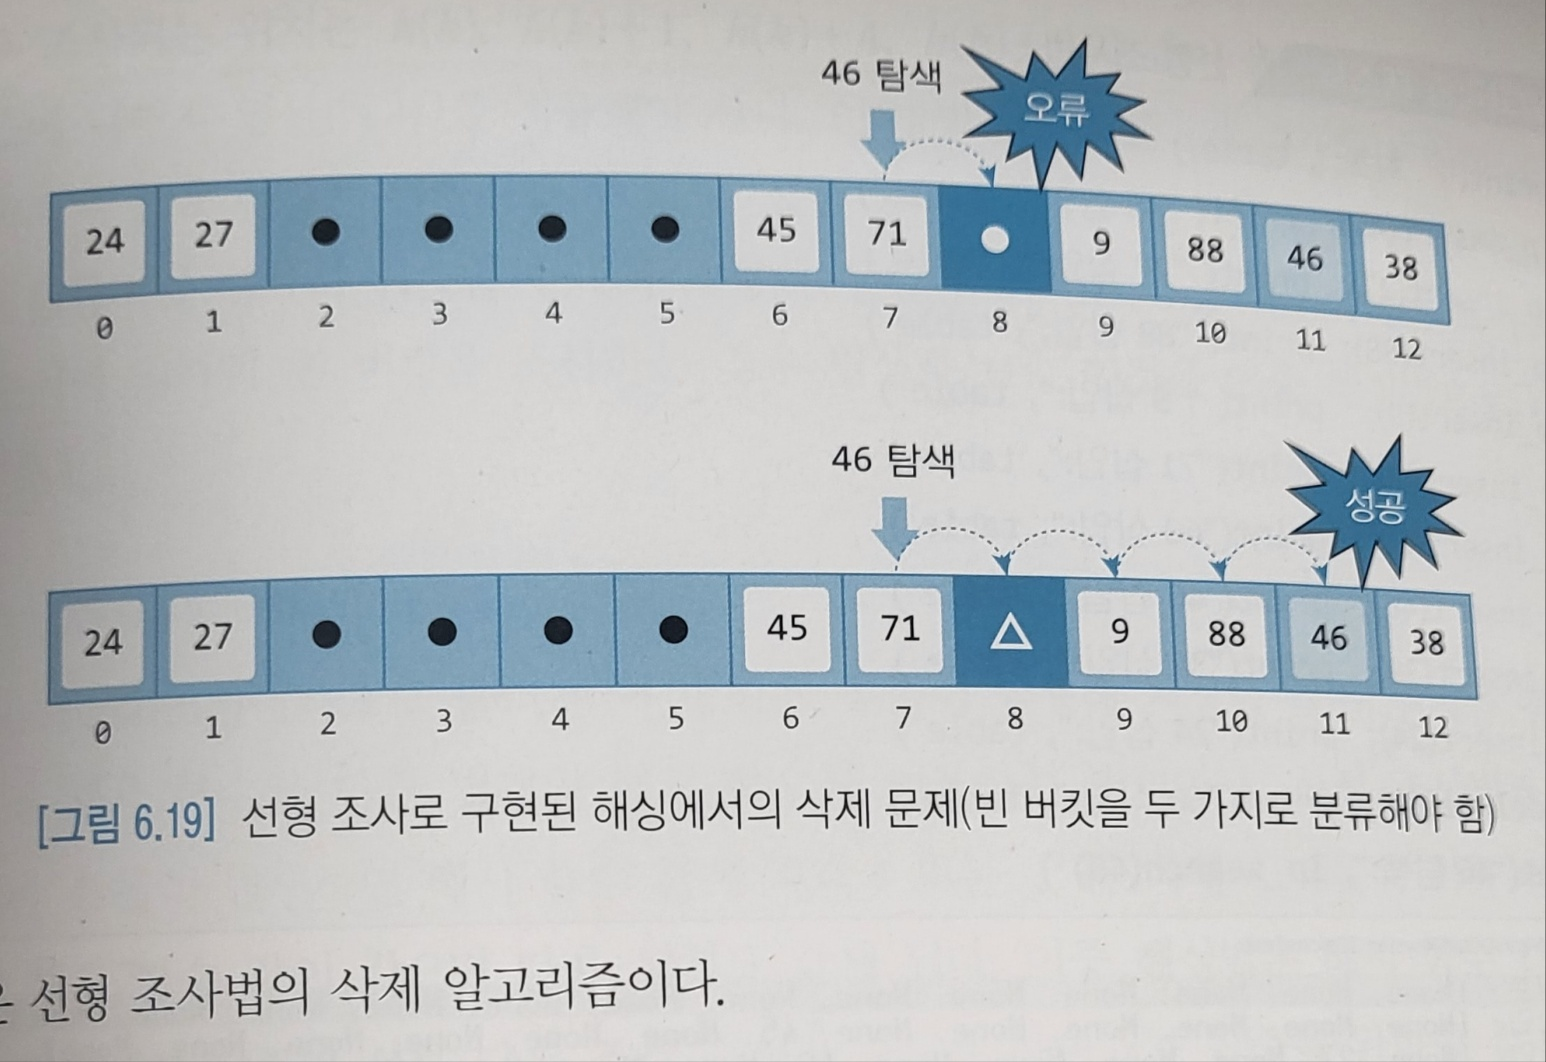

### 4) 코드 개요

6-6  
1, 2행 : 크기 M인 테이블을 만들고 None(항목없음)으로 초기화한다.  
3, 4행 : 해시 함수로 킷값을 M으로 나눈 나머지 연산을 사용한다.  
7행 : 킷값을 해시 함수에 적용해 해시 주소 id를 구한다.  
9행 : id번째 테이블이 비어있지 않으면 계속 다음 위치를 검사한다.  
12행 : 비어있는 버킷을 찾으면 키를 저장한다.  

6-7  
5, 6행 : 해당 버킷이 비었으면 찾는 항목이 없는 것이다.  
9행 : 해당 버킷이 비어있지 않은데 찾는 키도 아니면 다른 키에 의해 사용되고 있는 경우다. 이 경우 연속적으로 다음 버킷을 검사한다.  

6-8  
6행 : 해당 버킷에 찾는 키가 있으면 이제 그 항목을 삭제한다. 이때, None으로 처리하지 않고 -1로 처리하였다. 이 것은 사용되었다가 삭제된 버킷을 의미하는 것이다.  

### 5) 알고리즘 코드

In [5]:
## 6-6
M = 13
NONE = None
table = [NONE] * M

def hashFn(key):
    return key % M

def lp_insert(key):
    id = hashFn(key)
    count = M
    while count > 0 and (table[id] != NONE):
        id = (id + 1) % M
        count -= 1
    if count > 0:
        table[id] = key

In [4]:
## 6-7

def lp_search(key):
    id = hashFn(key)
    count = M
    while count > 0 :
        if table[id] == None :
            return None
        if table[id] == key :
            return table[id] 
        id = (id + 1 + M) % M
        count -= 1
    return None

In [6]:
## 6-8
def lp_delete(key):
    id = hashFn(key)
    count = M
    while count > 0 :
        if table[id] == None : return
        if table[id] != -1 and table[id] == key :
            table[id] =-1
            return
        id = (id + 1 + M) % M
        count -= 1

### 6) 수행결과

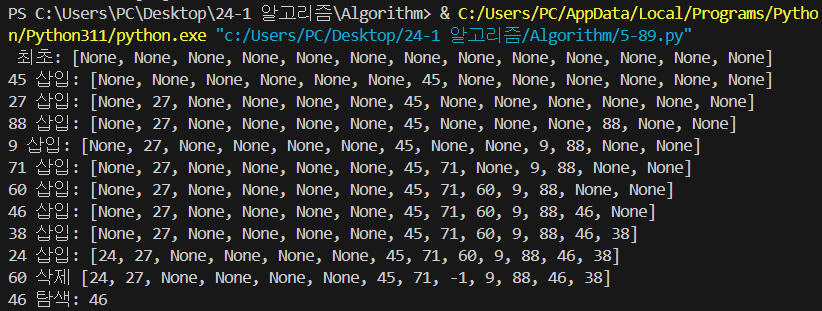

### 7) 테스트 코드

In [7]:
print(" 최초:", table)
lp_insert(45); print("45 삽입:", table)
lp_insert(27); print("27 삽입:", table)
lp_insert(88); print("88 삽입:", table)
lp_insert(9); print("9 삽입:", table)
lp_insert(71); print("71 삽입:", table)
lp_insert(60); print("60 삽입:", table)
lp_insert(46); print("46 삽입:", table)
lp_insert(38); print("38 삽입:", table)
lp_insert(24); print("24 삽입:", table)
lp_delete(60); print("60 삭제", table)
print("46 탐색:", lp_search(46) )

 최초: [None, None, None, None, None, None, None, None, None, None, None, None, None]
45 삽입: [None, None, None, None, None, None, 45, None, None, None, None, None, None]
27 삽입: [None, 27, None, None, None, None, 45, None, None, None, None, None, None]
88 삽입: [None, 27, None, None, None, None, 45, None, None, None, 88, None, None]
9 삽입: [None, 27, None, None, None, None, 45, None, None, 9, 88, None, None]
71 삽입: [None, 27, None, None, None, None, 45, 71, None, 9, 88, None, None]
60 삽입: [None, 27, None, None, None, None, 45, 71, 60, 9, 88, None, None]
46 삽입: [None, 27, None, None, None, None, 45, 71, 60, 9, 88, 46, None]
38 삽입: [None, 27, None, None, None, None, 45, 71, 60, 9, 88, 46, 38]
24 삽입: [24, 27, None, None, None, None, 45, 71, 60, 9, 88, 46, 38]
60 삭제 [24, 27, None, None, None, None, 45, 71, -1, 9, 88, 46, 38]
46 탐색: 46


### 8) 복잡도 분석

시간 복잡도 : O(M)  
(M = 해시테이블의 크기)  